###################################### Section 0 ###########################################

## Read Data

In [1]:
import os
os.system("pip install pandas")
os.system("pip install matlab")
os.system("pip install seaborn")
os.system("pip install sklearn")
os.system("pip install mlxtend")
os.system("pip install statsmodels")
os.system("pip install plotly")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sea
import statsmodels.api as sm
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)
import pandas as pd
url = "https://raw.githubusercontent.com/neha0812/PIMS-BCFSA/master/New_Sample_Clean_latest.csv"
df = pd.read_csv(url, error_bad_lines=False)
df = df.dropna()
df=df.drop(['Unnamed: 0'],axis=1)
df = df.replace(',','', regex=True)


###################################### Section1.1 ###########################################

## Group Data by Area

In [2]:
Housing_group1=df.groupby('fsa')

## Price Percentage Change Comparison Among Different Areas


Text(0, 0.5, 'Price Percentage Change')

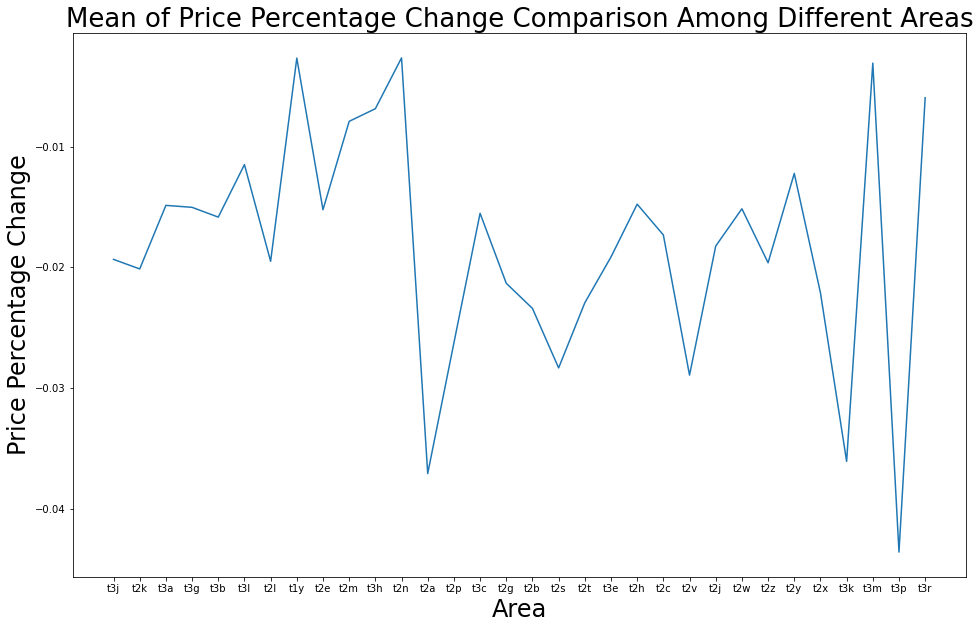

In [3]:
Area_mean=Housing_group1['pct_change'].mean()
Unique_Area=df['fsa'].unique()
Unique_Area=list(Unique_Area)
fig,ax=plt.subplots(1)
ax.set_title('Mean of Price Percentage Change Comparison Among Different Areas',fontdict={'fontsize':26})
ax.plot(Unique_Area,Area_mean)
ax.set_xlabel('Area',fontdict={'fontsize':24})
ax.set_ylabel('Price Percentage Change',fontdict={'fontsize':24})



## Price Percentage Change within Area


### Group Percentage_Change Data

In [4]:
pct_group=pd.qcut(df['pct_change'], q=4)
df['pct_group']=pct_group



### Create Frequency Table and Draw Barplot

Text(0, 0.5, 'Frequncy')

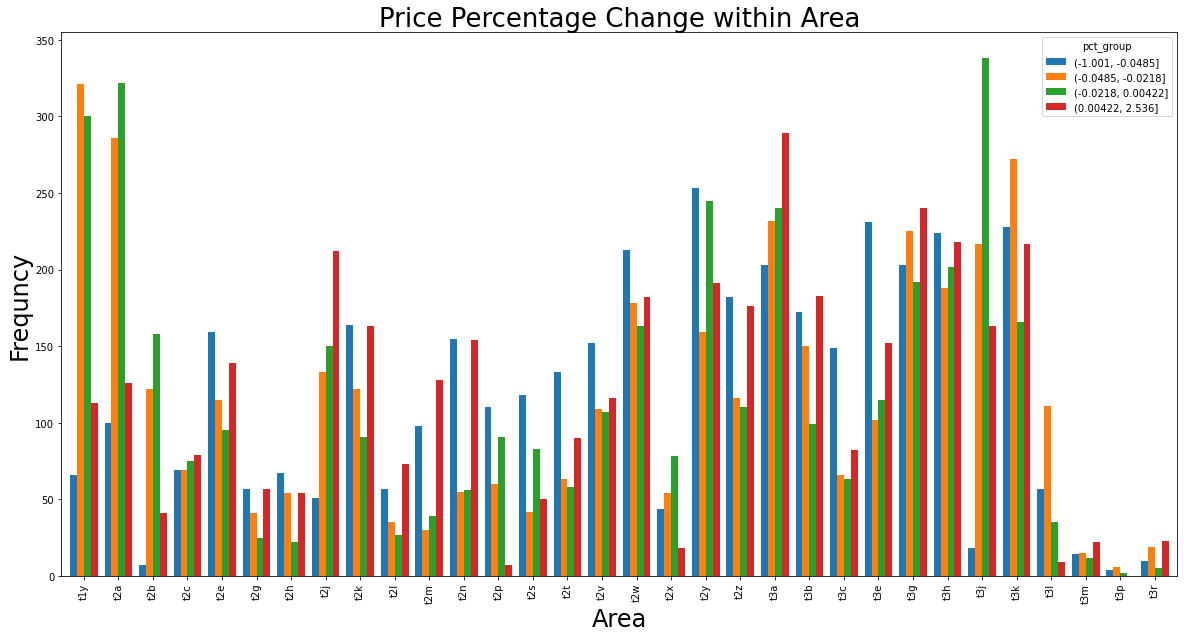

In [5]:
ax=pd.crosstab(df.fsa, df.pct_group).plot(kind='bar',width=0.8,figsize=[20,10])
ax.set_title('Price Percentage Change within Area',fontdict={'fontsize':26})
ax.set_xlabel('Area',fontdict={'fontsize':24})
ax.set_ylabel('Frequncy',fontdict={'fontsize':24})

##################################### Section1.2 ###########################################

## Group Data by Year

In [6]:
df.Year.unique()
Housing_group2=df.groupby('Year')

## Price Percentage Change Comparison Among Different Years

Text(0, 0.5, 'Price Percentage Change')

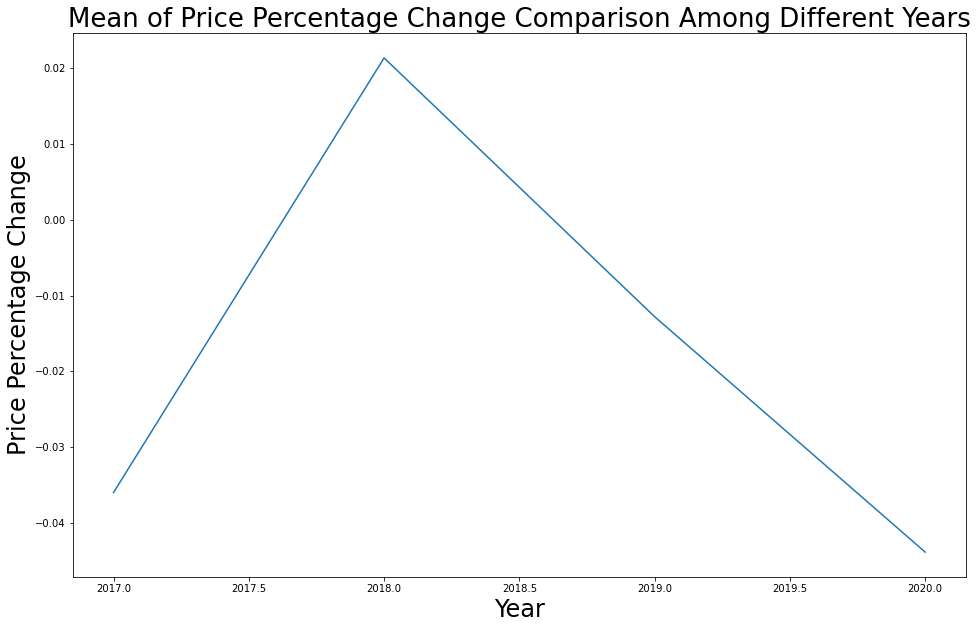

In [7]:
Year_mean=Housing_group2['pct_change'].mean()
Unique_Year=df['Year'].unique()
Unique_Year=list(Unique_Year)
fig,ax=plt.subplots(1)
ax.set_title('Mean of Price Percentage Change Comparison Among Different Years',fontdict={'fontsize':26})
ax.plot(Unique_Year,Year_mean)
ax.set_xlabel('Year',fontdict={'fontsize':24})
ax.set_ylabel('Price Percentage Change',fontdict={'fontsize':24})

## Price Percentage Change within Area

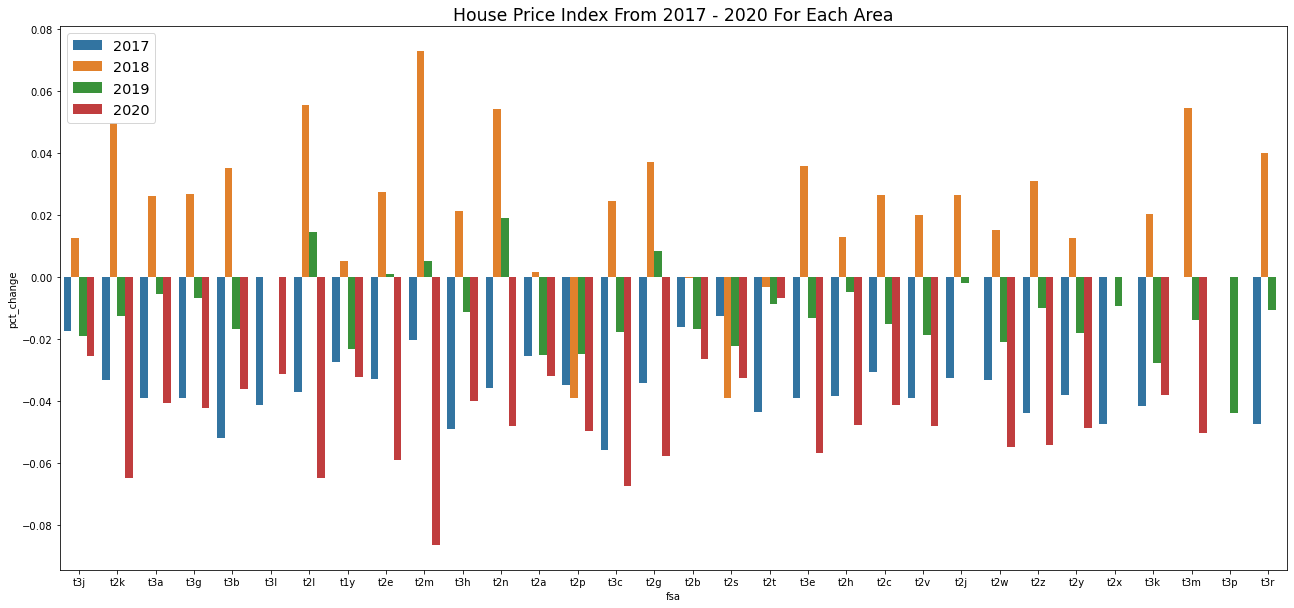

In [8]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('House Price Index From 2017 - 2020 For Each Area', fontsize = 'xx-large')
sea.barplot(data = df, x = 'fsa', y = 'pct_change', hue = 'Year',ci=None)
ax.legend(['2017', '2018', '2019', '2020'], fontsize = 'x-large')



###################################### Section 2.1 ###########################################

## Divide the Dataset into three Small Dataset and draw heatmap

Index(['pct_change', 'saf1', 'saf2', 'saf3', 'saf4', 'saf5', 'saf6', 'saf7',
       'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2', 'pop3', 'pop4', 'pop5',
       'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3', 'inc4', 'own1', 'own2',
       'own3', 'own4', 'lab1', 'lab2', 'lab3', 'vacancy_rate',
       'walk_score_comm', 'transit_score_comm', 'bike_score_comm',
       'comm_polulation'],
      dtype='object')


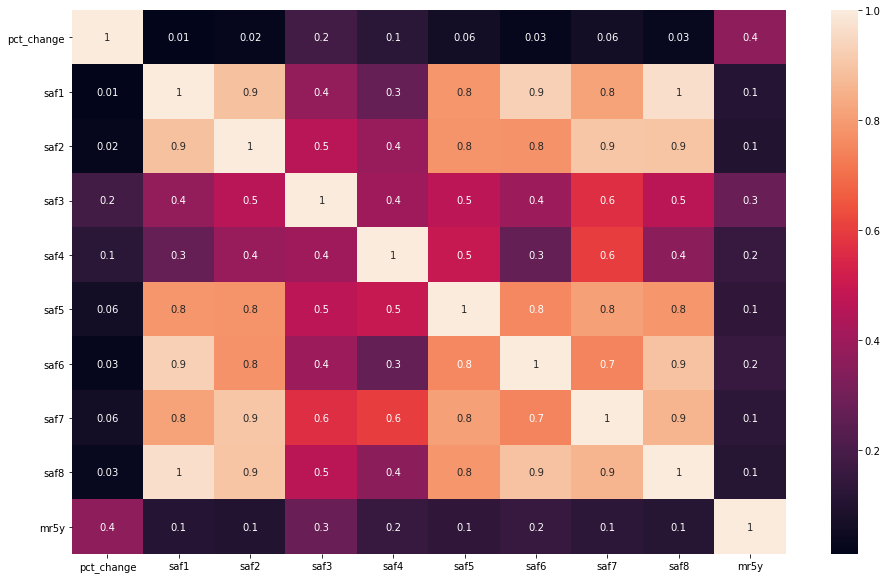

In [9]:
df1=df.copy()

df2=df1.drop(axis=1,columns=['ADDRESS','ASSESSED_VALUE','ASSESSMENT_CLASS','ASSESSMENT_CLASS_DESCRIPTION','COMM_NAME','COMM_CODE','LATITUDE','LONGITUDE','location','fsa','pct_group','ROLL_NUMBER','Year','YEAR_OF_CONSTRUCTION'])
print(df2.columns)
df3 = pd.concat([df2['pct_change'],df2['saf1'],df2['saf2'],df2['saf3'],df2['saf4'],df2['saf5'],df2['saf6'],df2['saf7'],df2['saf8'],df2['mr5y']], axis=1)
df3.columns = ['pct_change','saf1','saf2','saf3','saf4','saf5','saf6','saf7','saf8','mr5y']
sea.heatmap(df3.corr(), annot = True, fmt='.1g')

###################################### Section 2.2 ###########################################

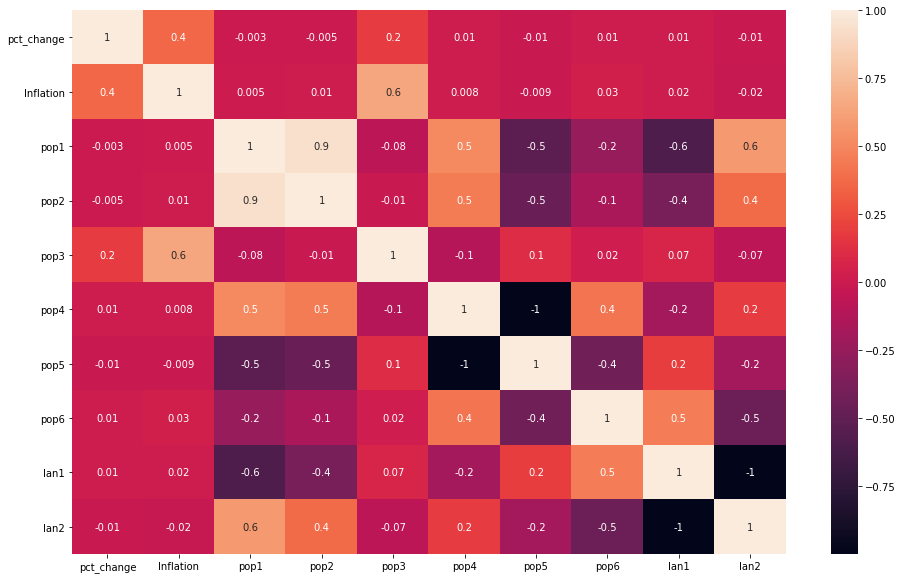

In [10]:
df4 = pd.concat([df2['pct_change'],df2['Inflation'],df2['pop1'],df2['pop2'],df2['saf3'],df2['pop4'],df2['pop5'],df2['pop6'],df2['lan1'],df2['lan2']], axis=1)
df4.columns = ['pct_change','Inflation','pop1','pop2','pop3','pop4','pop5','pop6','lan1','lan2']
sea.heatmap(df4.corr(), annot = True, fmt='.1g')

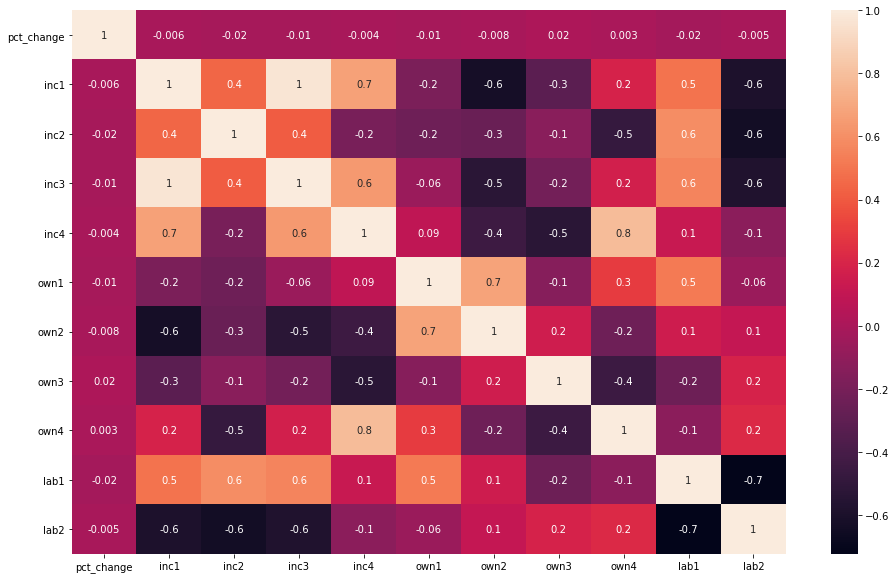

In [11]:
df5 = pd.concat([df2['pct_change'],df2['inc1'],df2['inc2'],df2['inc3'],df2['inc4'],df2['own1'],df2['own2'],df2['own3'],df2['own4'],df2['lab1'],df2['lab2']], axis=1)
df5.columns = ['pct_change','inc1','inc2','inc3','inc4','own1','own2','own3','own4','lab1','lab2']
sea.heatmap(df5.corr(), annot = True, fmt='.1g')

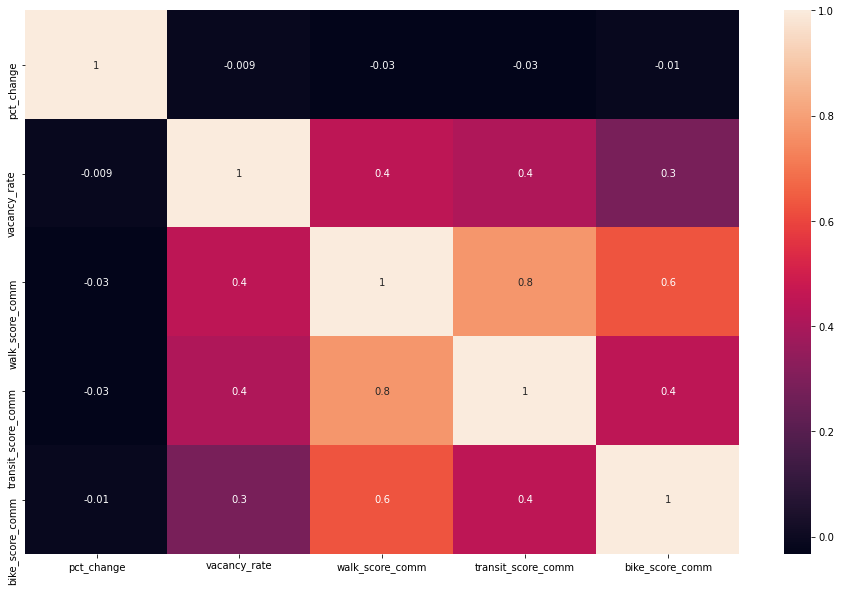

In [12]:
df2.columns
df6 = pd.concat([df2['pct_change'],df2['vacancy_rate'],df2['walk_score_comm'],df2['transit_score_comm'],df2['bike_score_comm'],df2['comm_polulation']], axis=1)
df6.columns = ['pct_change','vacancy_rate',
       'walk_score_comm', 'transit_score_comm', 'bike_score_comm',
       'comm_polulation']
sea.heatmap(df6.corr(), annot = True, fmt='.1g')

### According to the heatmap, mr5y and inflation is moderately correlated with pct_change

##################################### Section3.1 ########################################


## Feature Selections(Wrapper Methods)

### Forward variable selection

In [13]:
C2=df2.copy()
X_train, X_test, y_train, y_test = train_test_split(
    C2.values[:,:-1],
    C2.values[:,-1:],
    test_size=0.2,
    random_state=0)


clf = LinearRegression()


sfs1 = sfs(clf,k_features = 5,forward=True,floating=False, scoring='r2',cv=5)


sfs1 = sfs1.fit(X_train, y_train)
feat_cols = list(sfs1.k_feature_idx_)
C2.columns[feat_cols]

Index(['lan1', 'inc4', 'own2', 'own4', 'lab2'], dtype='object')

### Backward variable selection

In [14]:
df_o=df2.copy()
y_o=df_o['pct_change']
X_o=df_o.drop(columns='pct_change')
#Fitting sm.OLS model
model = sm.OLS(y_o,X_o.astype(float)).fit()
model.pvalues

cols = list(X_o.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_o[cols]
    X_1 = sm.add_constant(X_1.astype(float))
    model = sm.OLS(y_o,X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE[0:5])

['saf2', 'saf3', 'saf4', 'saf5', 'saf6']


##################################### Section3.2 ########################################



## Filter Method

### Anova and Regression

In [15]:
fvalue_selector = SelectKBest(f_regression,k=5)
X_kbest = fvalue_selector.fit_transform(X_o, y_o)
fvalue_selector.get_support([X_o.shape[1]])
X_new = fvalue_selector.transform(X_o)
print(X_o.columns[fvalue_selector.get_support(indices=True)])


Index(['saf3', 'saf4', 'saf7', 'mr5y', 'Inflation'], dtype='object')


##################################### Section4.1 ########################################

## Create A New Dataset 

### Find out the 0.5% and 99.5% quantile value of "ASSESSED_VALUE"

In [16]:
df.ASSESSED_VALUE.quantile([0.01,0.99])

0.01      10000.0
0.99    1723500.0
Name: ASSESSED_VALUE, dtype: float64

### Classify 'ASSESSED_VALUE' into three group---'P','M','R'

In [17]:
li=[]
for obser in df['ASSESSED_VALUE']:
    if obser>=1723500.0:
        li.append('R')
    elif obser<=10000.0:
        li.append('P')
    else:
        li.append('M')

### Create a new dataframe with the column of classification group('Community')of 'ASSESSED_VALUE '

In [18]:
df9=df2.copy()
data = {'Community':li}
data=pd.DataFrame(data)
df9['Community']=data
df9=pd.DataFrame(df9)

### Delete the rows of the new dataframe if Community'' is 'M'

In [19]:
df9 = df9[(df9['Community'] == 'R') | (df9['Community'] == 'P')]

##################################### Section4.2 ###########################################

## Using Anova to Find Out 5 Most Important Varaibles when Doing Classification

In [20]:
y9=df9['Community']
X9=df9.drop(axis=1,columns=['Community'])
fvalue_selector = SelectKBest(f_classif,k=5)
X_kbest = fvalue_selector.fit_transform(X9, y9)
fvalue_selector.get_support([X9.shape[1]])
#X_new = fvalue_selector.transform(X9)
X9.columns[fvalue_selector.get_support(indices=True)]

Index(['pop1', 'pop4', 'pop5', 'inc2', 'own4'], dtype='object')

##################################### Section4.3 ###########################################

## Classification Using Supporting Vector Machine(SVM)

### Creating another new dataset according to the 5 important variables  

In [21]:
classdf=pd.concat([X9['pop1'],X9['pop4'],X9['pop5'],X9['inc2'],X9['own4'],y9],axis=1)
classdf.columns = ['pop1','pop4','pop5','inc2','own4','community']
feature_cols = ['pop1','pop4','pop5','inc2','own4']
X = classdf[feature_cols] # Features
y = classdf.community # Target variable

### Split the dataset into training and testing dataset

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Use supporting vector machine(SVM)

In [23]:
classifier = svm.SVC(kernel='poly',degree=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   

Accuracy: 0.7244897959183674


### Let us find out which ones are misclassified and why they are misspecified

#### Firstly, let us take a look at the correlation between 'ASSESSED_VALUE' and other variables.

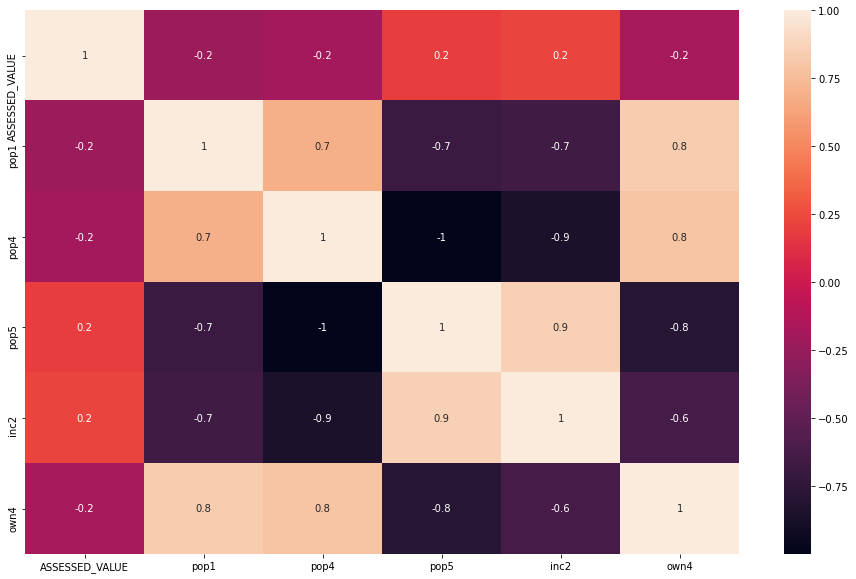

In [24]:
dfh = pd.concat([df['ASSESSED_VALUE'],df9['pop1'],df9['pop4'],df9['pop5'],df9['inc2'],df9['own4']], axis=1)
dfh.columns = ['ASSESSED_VALUE','pop1', 'pop4', 'pop5', 'inc2', 'own4']
sea.heatmap(dfh.corr(), annot = True, fmt='.1g')

#### (1)pop1:negatively correlated (2)pop4: negatively correlated (3)pop5:positively correlated (4)inc2: positively correlated (5)own4:negatively correlated

#### Secondly, let us take a look at the row indices of those misspecified data points and find out the reason

In [25]:
y_test=list(y_test)
y_pred=list(y_pred)
P_to_R = [index for index, value in enumerate(y_test) if (y_test[index]=='P') & (y_pred[index]=='R')]
R_to_P = [index for index, value in enumerate(y_test) if (y_test[index]=='R') & (y_pred[index]=='P')]
P_to_R#index of those houses which should have been had low prices, but has predicted high prices
R_to_P#index of those houses which should have been had high prices, but has predicted low prices
print(P_to_R,R_to_P)

[1, 4, 16, 26, 34, 35, 39, 41, 45, 54, 55, 57, 59, 64, 71, 76, 81, 84, 89, 91, 96, 97] [14, 25, 50, 88, 95]


###### Data of those houses which should have been had low prices, but has predicted high prices

In [26]:
X.iloc[[1, 4, 16, 26, 34, 35, 39, 41, 45, 54, 55, 57, 59, 64, 71, 76, 81, 84, 89, 91, 96, 97]]

,pop1,pop4,pop5,inc2,own4
321,35544,30.3,69.7,62.556268,0.599592
452,35544,30.3,69.7,62.556268,0.599592
1089,53224,30.7,69.3,60.912370,0.815186
1099,53224,30.7,69.3,60.912370,0.815186
2163,14214,30.0,70.0,62.192205,0.628023
2337,37348,32.4,67.7,61.047446,0.713906
3264,57237,31.5,68.5,57.873404,0.700551
3266,57237,31.5,68.5,57.873404,0.700551
3270,57237,31.5,68.5,57.873404,0.700551
3943,21086,23.6,76.4,67.793797,0.566069


###### Data of those houses which should have been had high prices, but has predicted low prices

In [27]:
X.iloc[[14, 25, 50, 88, 95]]

,pop1,pop4,pop5,inc2,own4
910,37348,32.4,67.7,61.047446,0.713906
1098,53224,30.7,69.3,60.912370,0.815186
3631,34729,26.6,73.4,65.838348,0.503484
4982,13056,21.5,78.4,67.823223,0.279715
5041,13056,21.5,78.4,67.823223,0.279715


##### We will focus on: Why some houses which should have been had high prices, but has low prices?

##### We calculate the outlier boundary for those 5 important varaiables

In [28]:
K=pd.DataFrame(X.describe())
two=K.iloc[4]
sev=K.iloc[6]
diff=sev-two
V1=list(two-1.5*diff)
V1[0]=0
V1[1]=0
V2=list(sev+1.5*diff)
dataset={'Outlier Lower Bound':V1,'Outlier Upper Bound':V2}
dataset=pd.DataFrame(dataset)
J=dataset.T
J.columns=['pop1','pop4','pop5','inc2','own4']
J.index=['Outlier Lower Bound','Outlier Upper Bound']
information=pd.concat([K,J])
information

,pop1,pop4,pop5,inc2,own4
count,489.000000,489.000000,489.000000,489.000000,489.000000
mean,46375.977505,28.667076,71.304908,63.346647,0.709729
std,20898.943341,3.598571,3.608718,3.851334,0.162517
min,9372.000000,21.000000,66.600000,57.483410,0.279715
25%,29706.000000,25.800000,69.300000,61.047446,0.565111
50%,46394.000000,29.700000,70.200000,62.504745,0.783727
75%,61344.000000,30.700000,74.100000,64.678980,0.843307
max,80792.000000,33.400000,79.000000,71.736011,0.934105
Outlier Lower Bound,0.000000,0.000000,62.100000,55.600145,0.147818
Outlier Upper Bound,108801.000000,38.050000,81.300000,70.126280,1.260600


##### The the reason comes out after comparison

In [29]:
list5=['pop1','pop4','pop5','inc2','own4']


In [30]:
list6=[]
R=X.iloc[[14, 25, 50, 88, 95]]
H1={'property value depreciation reason':list6}
H1=pd.DataFrame(H1)
H1
R['Reasons']=H1
R=pd.DataFrame(R)
R.iloc[0,5]="high pop4,low pop5,low inc2"
R.iloc[1,5]="high pop4,low pop5,low inc2"
R.iloc[2,5]="Unknown Reason"
R.iloc[3,5]="Unknown Reason"
R.iloc[4,5]="unknown Reason"
print(R)


print('pop1:Population, 2016')
print('pop4:distribution (%) of the population by broad age groups, 0 to 14 years+65 years and over')
print('pop5:distribution (%) of the population by broad age groups, 15 to 64 years')
print('inc2:Number of employment income recipients aged 15 years and over in private households')
print('own4:owner households/(Total - Owner households + Total - Tenant households)')



       pop1  pop4  pop5       inc2      own4                      Reasons
910   37348  32.4  67.7  61.047446  0.713906  high pop4,low pop5,low inc2
1098  53224  30.7  69.3  60.912370  0.815186  high pop4,low pop5,low inc2
3631  34729  26.6  73.4  65.838348  0.503484               Unknown Reason
4982  13056  21.5  78.4  67.823223  0.279715               Unknown Reason
5041  13056  21.5  78.4  67.823223  0.279715               unknown Reason
pop1:Population, 2016
pop4:distribution (%) of the population by broad age groups, 0 to 14 years+65 years and over
pop5:distribution (%) of the population by broad age groups, 15 to 64 years
inc2:Number of employment income recipients aged 15 years and over in private households
own4:owner households/(Total - Owner households + Total - Tenant households)


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Put the counts of each reason in a histogram


Text(0.5, 0, 'Reasons')

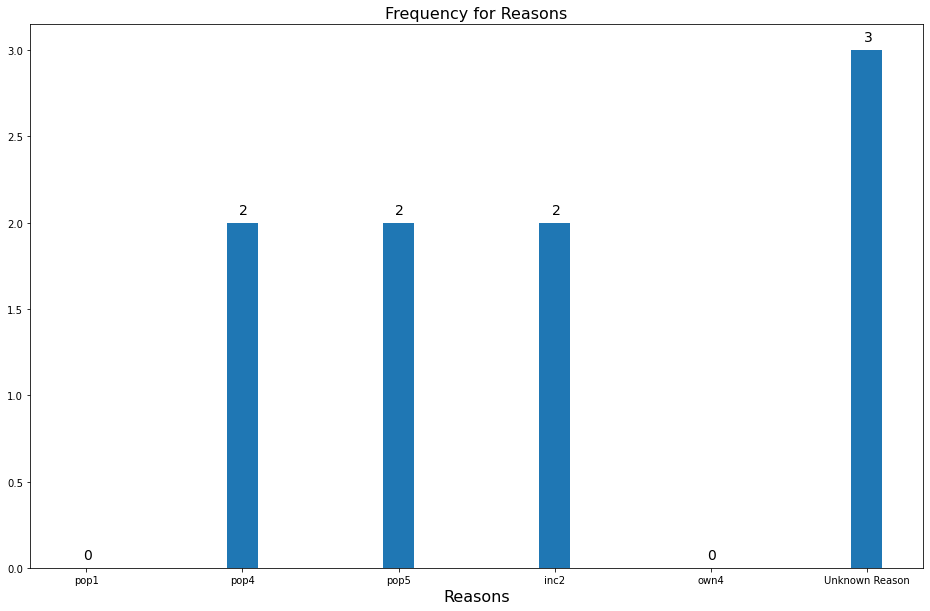

In [31]:
counts=[0,2,2,2,0,3]
counts={'Frequency':counts}
counts=pd.DataFrame(counts)
Reasons=['pop1','pop4','pop5','inc2','own4','Unknown Reason']
Reasons={'Reasons':Reasons}
Reasons=pd.DataFrame(Reasons)
d1=pd.concat([Reasons,counts],axis=1)
bars = plt.bar(d1.Reasons, height=d1.Frequency, width=0.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.08, yval + .05, yval,fontsize=14)
plt.title('Frequency for Reasons',fontsize=16)
plt.xlabel('Reasons',fontsize=16)